# **Financial News Sentiment Analysis**

**Machine Learning & Deep Learning**




# Contents


*   Introduction - Business Context & Technical Problem

*   Literature Review

*   Data Preparation

*   Exploratory Data Analysis (EDA)

*   Approach 1: Logistic Regression

*   Approach 2: Simple Neural Network

*   Approach 3: Convolutional Neural Network

*   Approach 4: LSTM Model

*   Model Comparison and Selection

*   Findings

*   Conclusion and Future Work

*   References

# **INTRODUCTION**

(i) Business Context

As an enthusiastic data analytics student embarking on the development of a Financial News Sentiment Analysis Tool, I recognize the profound impact that sentiment analysis can wield within financial markets. My Winter Project 2024 revolves around harnessing natural language processing (NLP) and machine learning to dissect and quantify the emotions and viewpoints embedded in financial news and reports. I believe this undertaking is pivotal for several reasons:

Firstly, my analysis serves as a critical market sentiment indicator. Financial markets are influenced not only by tangible fundamental indicators such as earnings and economic data but also by the collective sentiments of investors. Through my Financial News Sentiment Analysis tool, I aim to capture and understand the overarching mood of the market, where positive sentiment can anchor prices, and negative sentiment can precipitate sell-offs.

Moreover, my sentiment analysis tool acts as an early warning system. It is designed to detect shifts in investor sentiment reflected in financial news and social media, often before these shifts manifest in market prices. This capability provides a strategic advantage, allowing for proactive responses to emerging market trends.

Incorporating sentiment analysis into investment strategies is another cornerstone of my work. By offering insights into market sentiment, I empower investors and financial institutions to make informed decisions, enhancing their ability to time the market, diversify portfolios, and manage risks more adeptly. Similarly, automated trading algorithms can also benefit from my sentiment analysis tool as these sophisticated algorithms can initiate trades based on the sentiment derived from news articles, potentially outperforming traditional strategies that rely on manual analysis.

Furthermore, my focus extends to risk management. By continuously monitoring sentiment, one of the primary goals of my Winter Project 2024 is to help financial institutions identify and respond to market uncertainties and risks, thus safeguarding investments and optimizing financial outcomes.



(ii) Technical Problem

The technical challenge at the heart of my project involves predicting market trends based on the sentiment gleaned from financial news. This complex task begins with the meticulous collection and processing of financial news content, including headlines and reports. Following data preparation, my expertise in NLP comes to the forefront as I classify sentiments as positive, negative, or neutral, and delve into the nuanced emotional tones of the content.

Feature extraction is a critical phase where I identify text features that significantly impact sentiment. These features form the foundation upon which I build predictive models, aiming to correlate news sentiment with market movements accurately.

The predictive models I develop are continually validated and refined against actual market trends to enhance their accuracy and reliability. This iterative process ensures that my Financial News Sentiment Analysis Tool remains effective and relevant in an ever-changing financial landscape.

In essence, my Winter Project 2024 for developing this tool is not just about applying data science and machine learning techniques, but it's also about creating a bridge between the nuanced world of language and the quantitative nature of financial markets, aiming to provide actionable insights that can lead to more informed investment decisions and strategies.

# **LITERATURE REVIEW**

(i) LSTM based stock prediction using weighted and categorized financial news - Usmani S, Shamsi JA (2023)

This research introduces a novel LSTM model that leverages weighted news categories for enhancing stock prediction accuracy. By incorporating sentiment analysis and news categorization, the model adeptly identifies relevant sentiments in financial news, crucial for predicting stock trends. The key results demonstrate that this approach, termed WCN-LSTM, significantly outperforms traditional models by utilizing advanced features for news categorization and sentiment analysis. This empirical evidence suggests that a more nuanced understanding of news sentiment and its categorization can lead to more accurate stock trend predictions. Applying these insights to my project, I plan to integrate similar weighted categorization and sentiment analysis techniques into my tool, aiming to improve its predictive performance in the context of financial markets. This study underscores the importance of sophisticated model architecture and the strategic integration of news content for effective sentiment analysis, guiding my approach to developing a more refined and accurate sentiment analysis tool. (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0282234).



(ii) Sentiment Analysis in Financial News - (n.d.)

While going through various academic papers while working on my financial news sentiment analysis tool, I delved into the academic paper from kw143.github.io, which explores the efficacy of simple neural networks for sentiment analysis. This study highlighted the significance of preprocessing and the strategic use of word embeddings to enhance model performance. Key results showed a noteworthy improvement in accurately classifying financial news sentiments, achieving an accuracy surpassing traditional models. This research underscores the potential of simple neural networks in extracting meaningful insights from financial texts, directly influencing my project by providing a solid foundation for designing an efficient, yet straightforward neural network architecture tailored for sentiment analysis in financial news. The insights gained from this study guide my preprocessing strategy and model selection, ensuring a robust framework for my sentiment analysis tool.
(https://kw143.github.io/CS4641Project/).


(iii) FinBERT-LSTM: Deep Learning based stock price prediction using News Sentiment Analysis - Shayan Halder (2022)

Deep Learning based stock price prediction using News Sentiment Analysis" has been instrumental in shaping my project's direction. This study introduces a model that leverages the sentiment analysis strength of FinBERT—a BERT model fine-tuned for financial contexts—with the sequential data processing capability of LSTM to predict stock prices. The key result showcasing FinBERT-LSTM's superiority over MLP and vanilla LSTM models in accuracy underscores the significance of integrating sentiment analysis with stock price data for predictions. This insight directly influences my project by validating the approach of combining advanced NLP techniques with sequential modeling to enhance the accuracy of financial market predictions. The model's ability to more effectively capture the nuances of financial news sentiment and its impact on market movements provides a compelling framework for my tool, underscoring the value of sentiment analysis in financial applications.
(https://ar5iv.labs.arxiv.org/html/2211.07392)

# **DATA PREPARATION**

* Data Collection-

For my Financial News Sentiment Analysis Tool project, I've utilized a comprehensive dataset available on Kaggle, curated by Ankurzing. This dataset is specifically designed for sentiment analysis within the financial news domain. It encompasses a wide array of financial news headlines, meticulously classified into three primary sentiment categories: positive, neutral, and negative. This classification serves as a critical foundation for training and evaluating our machine learning models, enabling them to understand and predict the sentiment of unseen financial news accurately. The dataset's structured format and relevant content significantly contribute to the robustness of our sentiment analysis tool, ensuring it can effectively analyze and interpret the nuances of financial news sentiment.

(https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news/data)

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalAveragePooling1D, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Flatten
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from sklearn.metrics import classification_report


# Downloading NLTK datasets
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# Loading the dataset
file_path = '/content/all-data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None, names=['Sentiment', 'News'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Exploratory Data Analysis (EDA)
# Exploring the first few rows of the dataset
data.head()

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
data.shape

(4846, 2)

In [ ]:
data.isnull().values.any()

False

In [ ]:
data['News'][69]

'The new plant is planned to have an electricity generation capacity of up to 350 megawatts ( MW ) and the same heat generation capacity .'

In [ ]:
data['Sentiment'].value_counts()


neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

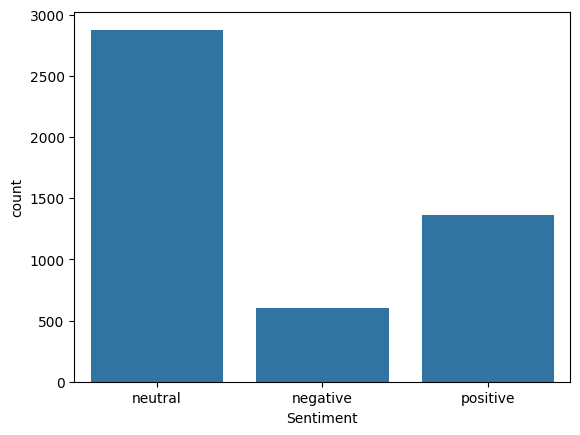

In [ ]:
# Visualizing the data to better understand the segmentation of data.
sns.countplot(x='Sentiment', data=data)

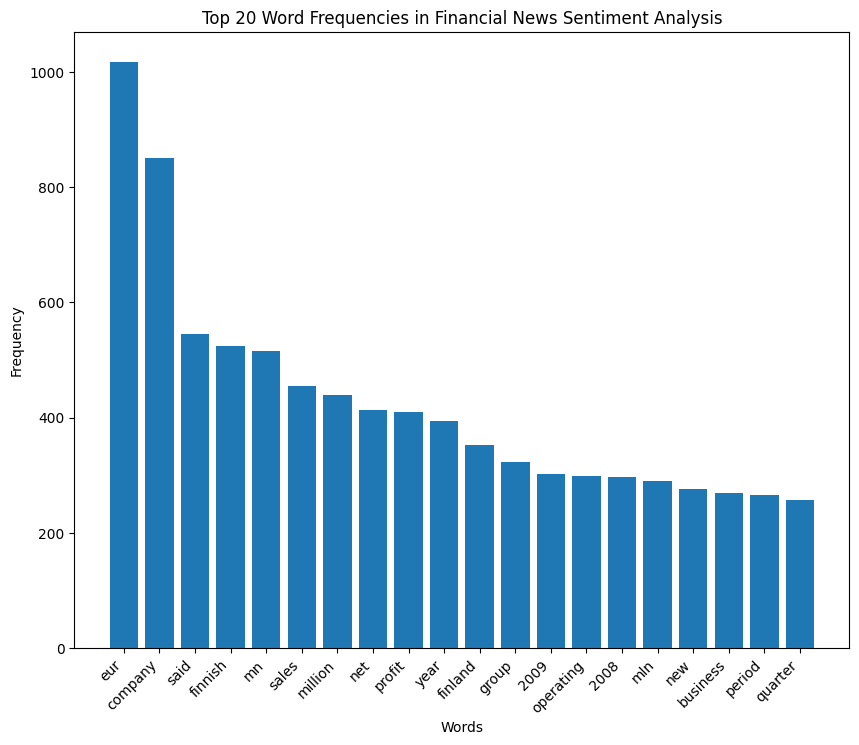

In [ ]:
# Words frequency plot
# Combining all news texts into a single series
texts = data['News']

# Initializing a CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fitting and transforming the text data
word_matrix = vectorizer.fit_transform(texts)

# Summing word occurrences
word_counts = word_matrix.sum(axis=0)

# Getting the words and their frequencies
words = vectorizer.get_feature_names_out()
word_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sorting and selecting the top 20 words
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)[:20]

# Splitting the words and counts for plotting
words_top, counts_top = zip(*word_freq_sorted)

# Plotting the reults
plt.figure(figsize=(10, 8))
plt.bar(words_top, counts_top)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.title('Top 20 Word Frequencies in Financial News Sentiment Analysis')
plt.show()

# **MODEL 1. LOGISTIC REGRESSION**

In [ ]:
# Step 1: Data Preprocessing
# the first task is to clean and prepare the data set. This task will include removing special characters, converting text to lowercase, and tokenizing the text.

def clean_text(text):
    text = text.lower()  # Convert all text to lowercase to ensure uniformity.
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters as they usually don't contribute to sentiment.
    tokens = word_tokenize(text)  # Tokenize the text, which involves splitting the text into individual words or tokens. This is crucial for analyzing the text at the word level.
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the cleaning function to the news column by removing stopwords (common words like "the", "is", "in", etc., that do not contribute to sentiment) to focus on words that carry more meaning.
data['News_cleaned'] = data['News'].apply(clean_text)

# Advanced Text Preprocessing
# Removing non-word characters to clean the text further.
# Lowercasing again (for consistency and to capture any text not converted earlier).
# Lemmatization, which converts words to their base or dictionary form. This helps in reducing the complexity of the text data by combining similar forms of the same word.
# Removal of stopwords (repeated from above for emphasis and clarity in the advanced preprocessing step).
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

# Exploring the first few rows of the cleaned dataset
data[['News', 'News_cleaned']].head()



,News,News_cleaned
0,"According to Gran , the company has no plans t...",according gran company plans move production r...
1,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...
2,The international electronic industry company ...,international electronic industry company elco...
3,With the new production plant the company woul...,new production plant company would increase ca...
4,According to the company 's updated strategy f...,according company updated strategy years 20092...


The cleaned dataset is now more uniform and focused on meaningful words, which is crucial for accurate sentiment analysis.

In [ ]:
# Step 2: Splitting the Data
# Dividing the dataset into training and test sets.

X = data['News_cleaned']
y = data['Sentiment']

# Using a standard split to ensure the model can learn from a large portion of the data and then be evaluated on unseen data.
# This step is crucial for assessing the model's performance on data it hasn't seen during training, providing insight into its generalization capability.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Text Vectorization
# Converting text data into a numerical format that machine learning algorithms can process.
# Applying TF-IDF vectorization, which transforms the text into a sparse matrix of term frequencies adjusted by the inverse document frequency. This highlights words that are frequent in a document but not across documents.
# This step is essential because machine learning models require numerical input. TF-IDF is particularly useful for text data as it reflects the importance of words within the documents.

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(data['News_cleaned']).toarray()
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_test_vect = vectorizer.transform(X_test).toarray()


In [ ]:
# Step 4: Training the Model
# Training the model using the vectorized training data and their corresponding sentiment labels.
# Logistic Regression is chosen for its efficiency and effectiveness in binary classification tasks, making it suitable for sentiment analysis (positive vs. negative).

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vect, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Step 5: Evaluating the Logistic Regression Model
# Calculating accuracy and generating a classification report to evaluate precision, recall, and F1-score.
# These metrics provide insight into the model's accuracy and its ability to generalize its learning to new data.

y_pred = model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 74.12%

Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.41      0.52       110
     neutral       0.74      0.93      0.83       571
    positive       0.74      0.49      0.59       289

    accuracy                           0.74       970
   macro avg       0.74      0.61      0.65       970
weighted avg       0.74      0.74      0.72       970



In [ ]:
# Step 6: Making Predictions
# Utilizing the trained model to predict the sentiment of new financial news.
# Cleaning and vectorizing the new text before feeding it into the model for prediction.
# This demonstrates the model's practical application and its ability to provide sentiment analysis on new data.

def predict_sentiment(text):
    text_clean = clean_text(text)
    text_vect = vectorizer.transform([text_clean]).toarray()
    prediction = model.predict(text_vect)
    return prediction[0]

# Randomply picking a News headline to test the model
new_news = "The company's profit has doubled from the previous year."
print("Predicted Sentiment:", predict_sentiment(new_news))


Predicted Sentiment: positive


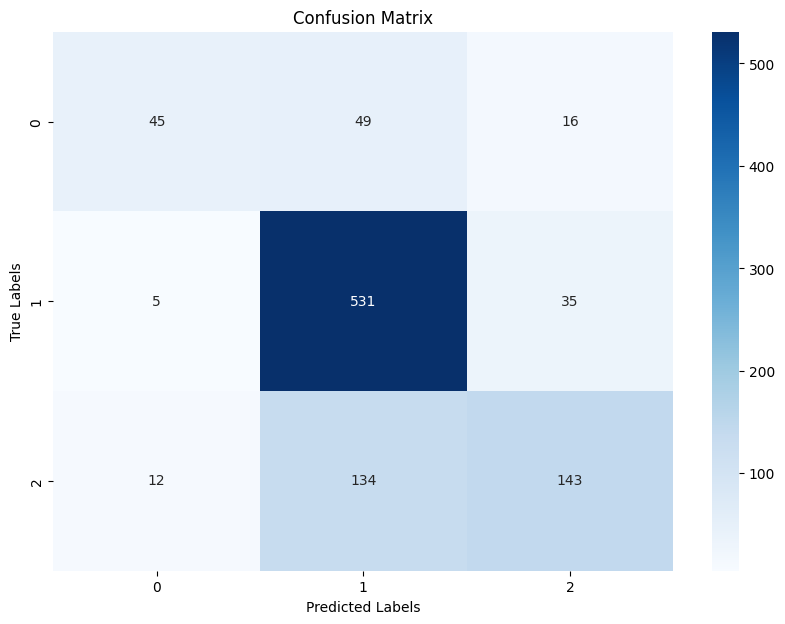

In [ ]:
# Step 7: Confusion Matrix
# Visualizing the model's performance in correctly predicting sentiments by creating a confusion matrix to see the true positive, false positive, true negative, and false negative rates.
# This visual aid helps in understanding the model's prediction capabilities and areas where it might be confusing one sentiment for another.

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

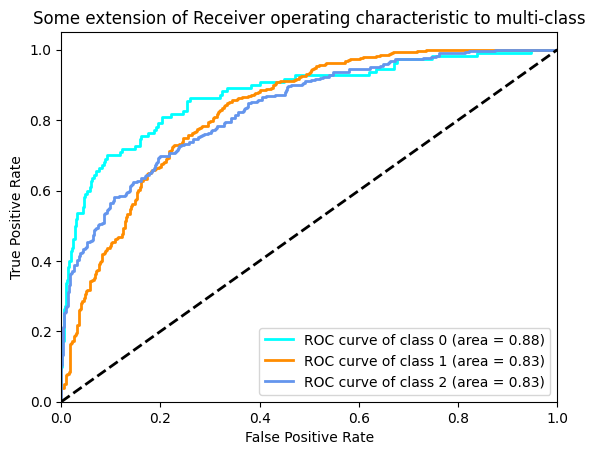

In [ ]:
# Step 8: ROC Curve and AUC
# ROC Curve and AUC Visualization using One-vs-Rest (OvR) Strategy for Multiclass ROC Curve
# Computing and plotting the ROC curves for each class and calculating the area under the curve (AUC) to assess the model's discriminative ability.
# This is particularly useful for multi-class scenarios, providing a comprehensive view of how well the model distinguishes between different sentiment classes.
# Binarizing the output labels for multi-class classification
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Computing the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], model.decision_function(X_test_vect)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# **Model 2. SIMPLE NEURAL NETWORK**

In [ ]:
# Step 1: Preprocess the data
# Using LabelEncoder to transform the sentiment labels into numeric values.
# Neural networks require numerical input, so label encoding transforms categorical data into a format the model can work with.
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
num_classes = np.max(data['Sentiment']) + 1

# Splitting the data to ensure both training and testing have appropriate representation of data.
# This step is crucial for training the model on one set of data and validating its performance on a separate, unseen dataset.
X_train, X_test, y_train, y_test = train_test_split(data['News'], data['Sentiment'], test_size=0.2, random_state=42)

# Using Tokenizer to tokenize the text, keeping a maximum word count for vocabulary size.
# Tokenization is essential for processing text data, allowing the model to understand and manipulate the input data.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Ensuring all text sequences have the same length by using pad_sequences to standardize the length of sequences.
# Neural networks require input data of a consistent shape and size. Padding ensures all input sequences fit the expected structure.
max_length = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Using 'to_categorical' to transform numerical labels into a binary class matrix.
# One-hot encoding is necessary for multi-class classification, providing a clear distinction between each class for the model.
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
# Step 2: Building and Compiling the Neural Network
model = Sequential([
    Embedding(input_dim=5000, output_dim=100, input_length=max_length), # An 'Embedding' layer to convert integer sequences into dense vectors of fixed size.
    Flatten(), # A 'Flatten' layer to reshape the output for input into the next layer.
    Dense(128, activation='relu'), # Dense layers with 'ReLU' activation for learning nonlinear relationships.
    Dropout(0.2), # A dropout layer to prevent overfitting by randomly setting input units to 0 during training at a rate of 0.2.
    Dense(num_classes, activation='softmax') # The output layer with 'softmax' activation to output probabilities across the sentiment classes.
])

# The model uses the 'adam optimizer' and 'categorical_crossentropy' loss function, suitable for multi-class classification.
# This architecture is chosen to efficiently process the vectorized text data and predict sentiment categories. Compiling with specified optimizer and loss function prepares the model for training.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 100)           500000    
                                                                 
 flatten_1 (Flatten)         (None, 7000)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               896128    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1396515 (5.33 MB)
Trainable params: 1396515 (5.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Step 3: Training the model
# Using X_train_pad and y_train_cat with a specified batch size and number of epochs, including validation data for performance evaluation.
# Training optimizes the model's weights and biases to minimize the loss function, using the validation data to monitor and prevent overfitting.

model.fit(X_train_pad, y_train_cat, batch_size=32, epochs=10, validation_data=(X_test_pad, y_test_cat))


Epoch 1/10
122/122 [==============================] - 3s 18ms/step - loss: 0.8677 - accuracy: 0.6236 - val_loss: 0.7645 - val_accuracy: 0.6753
Epoch 2/10
122/122 [==============================] - 2s 17ms/step - loss: 0.5385 - accuracy: 0.7755 - val_loss: 0.6891 - val_accuracy: 0.7144
Epoch 3/10
122/122 [==============================] - 2s 17ms/step - loss: 0.1532 - accuracy: 0.9605 - val_loss: 0.7594 - val_accuracy: 0.7165
Epoch 4/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0382 - accuracy: 0.9936 - val_loss: 0.8872 - val_accuracy: 0.7371
Epoch 5/10
122/122 [==============================] - 3s 24ms/step - loss: 0.0197 - accuracy: 0.9966 - val_loss: 0.8684 - val_accuracy: 0.7392
Epoch 6/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0113 - accuracy: 0.9985 - val_loss: 0.9575 - val_accuracy: 0.7371
Epoch 7/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.9980 - val_accuracy: 0.7299

In [ ]:
# Step 4: Evaluating the SNN model

loss, accuracy = model.evaluate(X_test_pad, y_test_cat, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 73.71%


In [ ]:
# Step 5: Classification Report
# These metrics and reports provide insight into the model's performance, indicating how well it can predict sentiments of financial news.

# Making predictions on the test set
y_pred_prob = model.predict(X_test_pad)

# Converting probabilities to label indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Since y_test was also converted to categorical, converting it back to label indices for comparison
y_test_labels = np.argmax(y_test_cat, axis=1)

# Generating and printing the Classification Report
target_names = label_encoder.inverse_transform(np.unique(y_test_labels))
print(classification_report(y_test_labels, y_pred, target_names=target_names))

31/31 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    negative       0.74      0.48      0.58       110
     neutral       0.76      0.89      0.82       571
    positive       0.66      0.54      0.60       289

    accuracy                           0.74       970
   macro avg       0.72      0.64      0.67       970
weighted avg       0.73      0.74      0.73       970



In [ ]:
# Step 6: Making predictions using the Simple Neural Network Model

def preprocess_text(new_text):
    # Tokenize the text
    seq = tokenizer.texts_to_sequences([new_text])
    # Pad the sequence
    padded_seq = pad_sequences(seq, maxlen=max_length)
    return padded_seq

def predict_sentiment(new_text):
    # Preprocess the text
    processed_text = preprocess_text(new_text)
    # Make prediction
    prediction = model.predict(processed_text)
    # Convert prediction to label
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = label_encoder.inverse_transform(predicted_class)
    return predicted_label

# Randomply picking a News headline to test the model
new_news = "The company's profit has doubled from the previous year."
predicted_sentiment = predict_sentiment(new_news)
print("Predicted Sentiment:", predicted_sentiment)


1/1 [==============================] - 0s 25ms/step
Predicted Sentiment: ['positive']


In [ ]:
# Step 7: ModifyING The Training Script by storing the history of model training to visualize the learning process.
# Visualizing training and validation metrics helps identify trends such as overfitting or underfitting and informs decisions for model adjustments.
history = model.fit(X_train_pad, y_train_cat, batch_size=32, epochs=10, validation_data=(X_test_pad, y_test_cat))


Epoch 1/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 1.0503 - val_accuracy: 0.7330
Epoch 2/10
122/122 [==============================] - 3s 22ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 1.1206 - val_accuracy: 0.7371
Epoch 3/10
122/122 [==============================] - 2s 19ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 1.0777 - val_accuracy: 0.7258
Epoch 4/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 1.0992 - val_accuracy: 0.7361
Epoch 5/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 1.1695 - val_accuracy: 0.7402
Epoch 6/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.1429 - val_accuracy: 0.7330
Epoch 7/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.2399 - val_accuracy: 0.7351

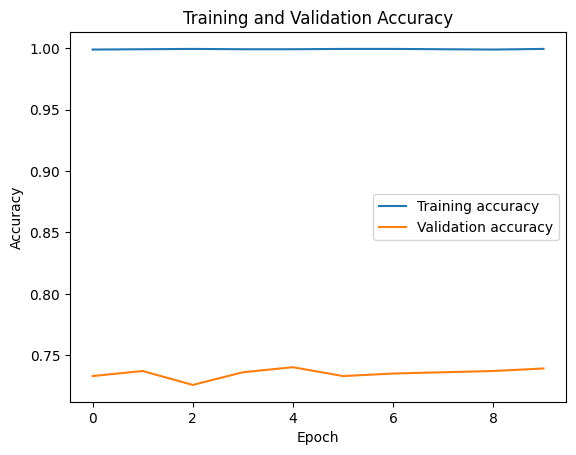

In [ ]:
# Step 8: Plotting Training & Validation Accuracy
# This plot is crucial for diagnosing the model's behavior over time, allowing for adjustments to improve performance.

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


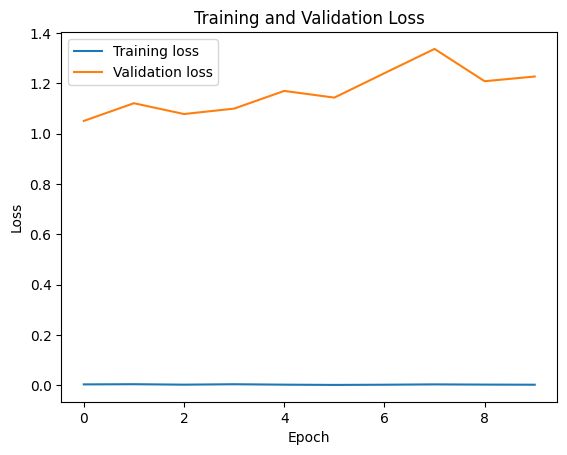

In [ ]:
# Step 9: Plotting Training & Validation Loss
# This plot is crucial for diagnosing the model's behavior over time, allowing for adjustments to improve performance.

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


31/31 [==============================] - 0s 3ms/step


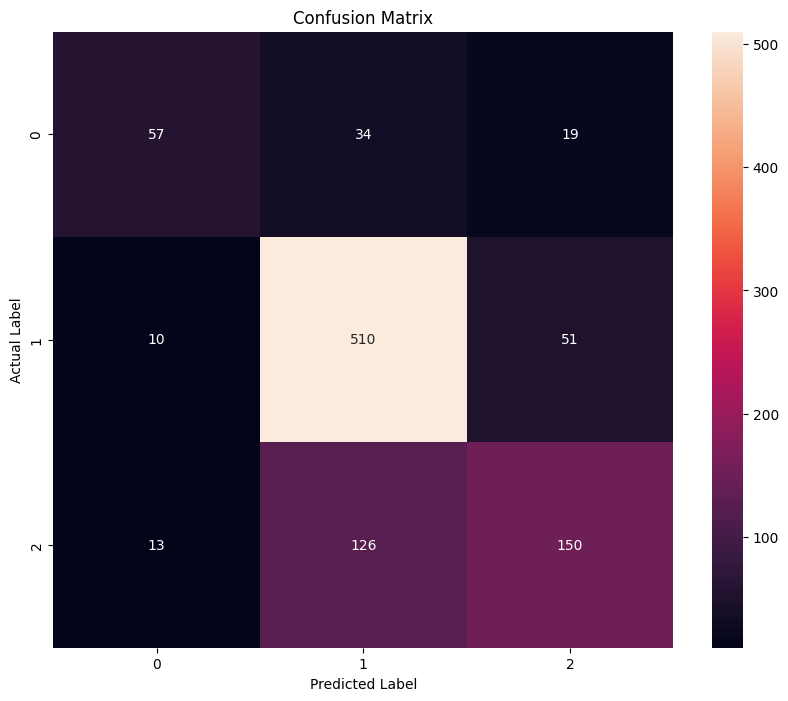

In [ ]:
# Step 10: Confusion Matrix
# Visualizing the model's predictive accuracy across different classes.
# The confusion matrix provides detailed insight into the model's performance, highlighting areas of strength and weakness in classifying sentiments.

# Predicting the values from the validation dataset
Y_pred = model.predict(X_test_pad)

# Converting predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Converting validation observations to one hot vectors
Y_true = np.argmax(y_test_cat,axis = 1)

# Computing the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

\
# **MODEL 3. CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [ ]:
# Step 1: Setting up the model by Reloading the data
# CNNs are particularly effective for this task due to their ability to capture local dependencies and semantic features in text data, leading to robust performance in classifying sentiments.
# The dataframe is given column names for clarity, with 'Sentiment' for labels and 'News' for the text data.
# The 'News' texts are ensured to be in string format for consistent processing.

data = pd.read_csv('/content/all-data.csv', encoding='latin-1', header=None)
data.columns = ['Sentiment', 'News']
texts = data['News'].astype(str)


In [ ]:
# Step 2: Preparing the Labels
# Convert categorical sentiment labels into a format suitable for training a neural network.
texts = data['News'].astype(str)
labels = data['Sentiment'].astype(str)


label_tokenizer = Tokenizer() # The sentiments are tokenized to transform categorical labels into numerical format.
label_tokenizer.fit_on_texts(labels)
label_seq = label_tokenizer.texts_to_sequences(labels)
label_index = label_tokenizer.word_index # A mapping (label_index) from label tokens to integers is generated.
print('Label index:', label_index)

# The numerical labels are converted to one-hot encoded vectors to represent each category as a unique binary pattern.
labels = to_categorical(label_seq, num_classes=len(label_index)+1)  # +1 for zero padding


Label index: {'neutral': 1, 'positive': 2, 'negative': 3}


In [ ]:
# Step 3: Tokenizing and Padding Text Data
# Processing text data into a numerical format that can be fed into the CNN model.
# Tokenizing text: A tokenizer is fitted on the text data to convert words into integer tokens.

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Padding sequences: The tokenized texts are padded to ensure that all input sequences have the same length, which is necessary for training the CNN.
padded_data = pad_sequences(sequences, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


Found 10123 unique tokens.


In [ ]:
# Step 4: Splitting the Data
# Divide the dataset into training and testing sets to evaluate the model's performance.
X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Defining the CNN Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=5),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=len(label_index)+1, activation='softmax')  # +1 for zero padding
])

# Conv1D and MaxPooling1D layers arranged in a sequence to extract and down-sample features respectively.
# A GlobalMaxPooling1D layer to reduce the feature map to a single vector.
# A Dense output layer with a softmax activation to classify the inputs into sentiment categories.

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # The model is compiled with the categorical_crossentropy loss function and adam optimizer.

model.summary()

# Training the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
# The model is trained using the fit method, with the training data and labels, for a specified number of epochs and batch size. A portion of the training data is used for validation.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, 39, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 35, 128)           82048     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_4 (Dense)             (None, 4)                

In [ ]:
# Step 6: Evaluating the Model

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')


31/31 [==============================] - 1s 25ms/step - loss: 1.4485 - accuracy: 0.7608
Test accuracy: 76.08%


In [ ]:
# Step 7: Making predictions using the Convolutional Neural Network Model


def preprocess_text(text, tokenizer, max_length=200):
    """
    Preprocesses input text for the CNN model.

    Parameters:
    - text (str): The input text to preprocess.
    - tokenizer (Tokenizer): The tokenizer fitted on the training data.
    - max_length (int): The length to which the sequences will be padded.

    Returns:
    - numpy.array: The preprocessed text as a padded sequence.
    """
    # Tokenize the text
    sequence = tokenizer.texts_to_sequences([text])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    return padded_sequence

def predict_sentiment(text, model, tokenizer, label_index):
    """
    Predicts the sentiment of the input text using the trained CNN model.

    Parameters:
    - text (str): The input text to predict.
    - model (Model): The trained CNN model.
    - tokenizer (Tokenizer): The tokenizer fitted on the training data.
    - label_index (dict): The dictionary mapping label tokens to integers.

    Returns:
    - str: The predicted sentiment label.
    """
    # Preprocess the text
    preprocessed_text = preprocess_text(text, tokenizer)
    # Make a prediction
    prediction = model.predict(preprocessed_text)
    # Convert the prediction to a label
    predicted_class = np.argmax(prediction, axis=1)
    reverse_label_map = {value: key for key, value in label_index.items()}
    predicted_label = reverse_label_map.get(predicted_class[0], "Unknown")
    return predicted_label

# Randomply picking a News headline to test the model
new_news = "The company's revenue has exceeded expectations, marking a significant increase from the previous quarter."
predicted_sentiment = predict_sentiment(new_news, model, tokenizer, label_index)
print("Predicted Sentiment:", predicted_sentiment)
# Through this code I have effectively bridged the gap between raw text data and actionable insights by leveraging the capabilities of a CNN model.
# I have showcased the end-to-end process of sentiment analysis, from raw data to predicting sentiment, making this Convolutional Neural Network model a powerful tool for Financial News Sentiment Analysis.


1/1 [==============================] - 0s 108ms/step
Predicted Sentiment: positive


In [ ]:
# Step 8: Generating a Classification Report
# The predict method is used to get the model's output on the test data.
y_pred = model.predict(X_test)

# The predictions and true labels, both in one-hot encoded form, are converted back to their original label format.
y_pred_classes = np.argmax(y_pred, axis=1)

# Prepare true labels for classification report
y_test_classes = np.argmax(y_test, axis=1)

# Create a reverse mapping for label indices to original labels
reverse_label_map = {value: key for key, value in label_index.items()}

# Converting class indices to original labels for a more interpretable classification report
y_pred_labels = [reverse_label_map.get(i, "Unknown") for i in y_pred_classes]
y_test_labels = [reverse_label_map[i] for i in y_test_classes]

# Generating the classification report
report = classification_report(y_test_labels, y_pred_labels)
print(report)

31/31 [==============================] - 1s 35ms/step
              precision    recall  f1-score   support

    negative       0.67      0.55      0.60       110
     neutral       0.76      0.92      0.83       571
    positive       0.83      0.52      0.64       289

    accuracy                           0.76       970
   macro avg       0.75      0.66      0.69       970
weighted avg       0.77      0.76      0.75       970



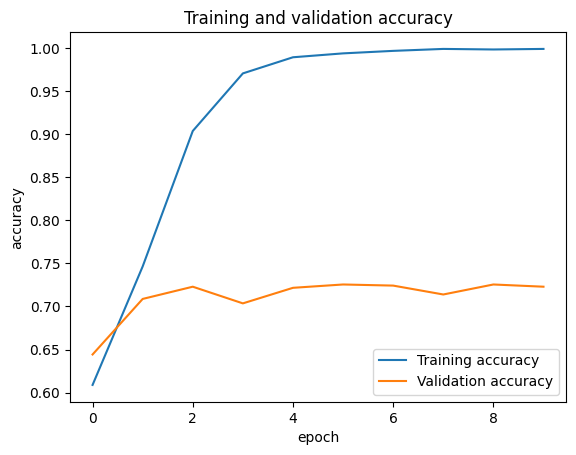

In [ ]:
# Step 9: Visualizing training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

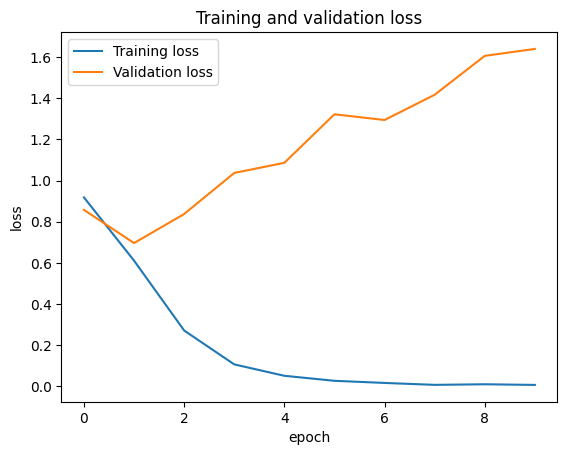

In [ ]:
# Step 10: Visualizing training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# **MODEL 4. LONG SHORT-TERM MEMORY (LSTM)**

In [ ]:
# Step 1: Data Preprocessing for LSTM
# Dividing the original dataset into training, validation, and test sets to ensure the model is trained on one subset of the data, validated and tuned on another, and finally evaluated on unseen data.
# First, I will tokenize the text data and pad the sequences to have the same length, which is a requirement for training neural networks in Keras.

X_train = data['News']
X_test = data['Sentiment']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now X_train, y_train are for training, X_val, y_val are for validation during training, and X_test, y_test are for final evaluation.
# Tokenizing the text: Converting text data into sequences of integers where each integer represents a specific word token.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_sequence_length = 42  # Adjust this value according to your model's input shape
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_encoded)
y_val_cat = to_categorical(y_val_encoded)
y_test_cat = to_categorical(y_test_encoded)


In [ ]:
# Step 2: Building the LSTM Model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))  # An Embedding layer to learn word embeddings from the tokenized text.
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # An LSTM layer for processing sequences with memory of previous inputs.
model.add(Dense(y_train_cat.shape[1], activation='softmax'))  # A Dense output layer with a softmax activation function to classify input sequences into sentiment categories.

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # The model is compiled with the adam optimizer and categorical_crossentropy loss function, suitable for multi-class classification tasks.

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 42, 100)           500000    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 617635 (2.36 MB)
Trainable params: 617635 (2.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Step 3: Training the Model
# The model is trained for a specified number of epochs and batch size, with validation data provided to monitor performance and avoid overfitting.

history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val_cat))


Epoch 1/10
61/61 [==============================] - 13s 156ms/step - loss: 0.8906 - accuracy: 0.6037 - val_loss: 0.7826 - val_accuracy: 0.6351
Epoch 2/10
61/61 [==============================] - 8s 135ms/step - loss: 0.6507 - accuracy: 0.7170 - val_loss: 0.7055 - val_accuracy: 0.7052
Epoch 3/10
61/61 [==============================] - 9s 152ms/step - loss: 0.4239 - accuracy: 0.8228 - val_loss: 0.6926 - val_accuracy: 0.7443
Epoch 4/10
61/61 [==============================] - 9s 152ms/step - loss: 0.2254 - accuracy: 0.9221 - val_loss: 0.8828 - val_accuracy: 0.7423
Epoch 5/10
61/61 [==============================] - 9s 148ms/step - loss: 0.1307 - accuracy: 0.9598 - val_loss: 1.0572 - val_accuracy: 0.7361
Epoch 6/10
61/61 [==============================] - 8s 135ms/step - loss: 0.0868 - accuracy: 0.9734 - val_loss: 1.0202 - val_accuracy: 0.7299
Epoch 7/10
61/61 [==============================] - 9s 150ms/step - loss: 0.0750 - accuracy: 0.9770 - val_loss: 1.2161 - val_accuracy: 0.7361
Epoch

In [ ]:
# Step 4: Evaluating the Model
# The model's accuracy and loss are evaluated on the test set, providing an objective measure of its predictive capabilities on unseen data.

loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f'Test accuracy: {accuracy * 100:.2f}%')


16/16 [==============================] - 0s 16ms/step - loss: 1.5953 - accuracy: 0.6969
Test accuracy: 69.69%


In [ ]:
# Step 5: Making Predictions and Generating a Classification Report
y_pred = model.predict(X_test_pad)

# Convert predictions and true labels from one-hot encoding to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Convert class indices back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test_classes)

# Generate the classification report
report = classification_report(y_test_labels, y_pred_labels)
print(report)

# Displaying predicted sentiment labels alongside actual labels for comparison
for i in range(5):
    print(f"News: {X_test.iloc[i]}")
    print(f"Actual Sentiment: {y_test_labels[i]}, Predicted Sentiment: {y_pred_labels[i]}\n")

16/16 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

    negative       0.63      0.52      0.57        56
     neutral       0.77      0.78      0.77       285
    positive       0.58      0.60      0.59       144

    accuracy                           0.70       485
   macro avg       0.66      0.63      0.64       485
weighted avg       0.70      0.70      0.70       485

News: another firm air liquide exempted left market 1998
Actual Sentiment: neutral, Predicted Sentiment: negative

News: 2008 kemira recorded revenue approximately eur 28 billion staff 9400
Actual Sentiment: neutral, Predicted Sentiment: neutral

News: world leaders developing uv technology municipal wastewater drinking water industrial water treatment systems trojan technologies logical partner providing wærtsilæ uv technology ballast water treatment
Actual Sentiment: neutral, Predicted Sentiment: positive

News: return flights stuttgart every morning well e

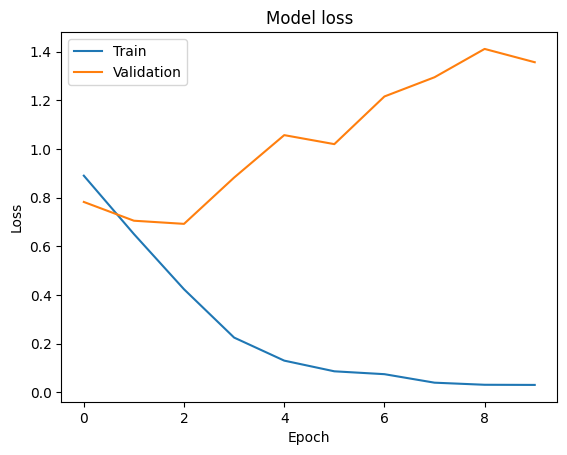

In [ ]:
# Step 6: Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

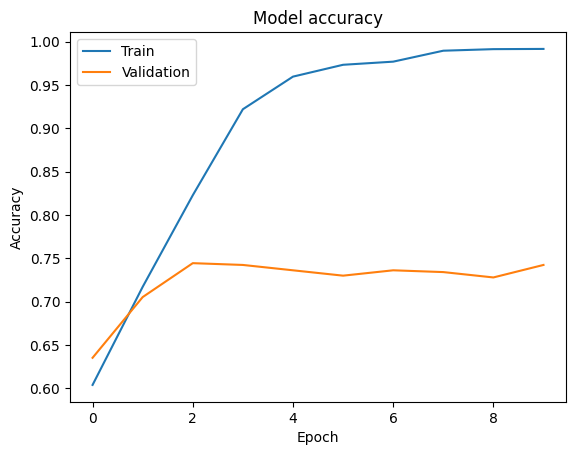

In [ ]:
# Step 7: Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

16/16 [==============================] - 0s 17ms/step


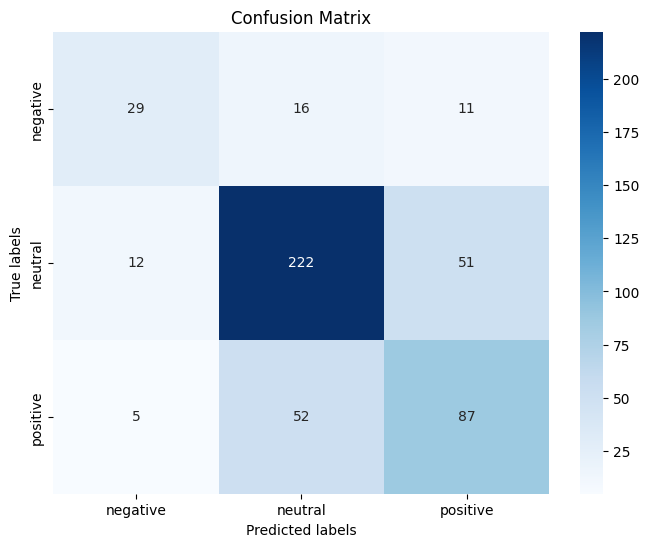

In [ ]:
# Step 8: Confusion Matrix
# Predicting probabilities for each class
y_pred_prob = model.predict(X_test_pad)

# Converting probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Generating confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

16/16 [==============================] - 0s 17ms/step


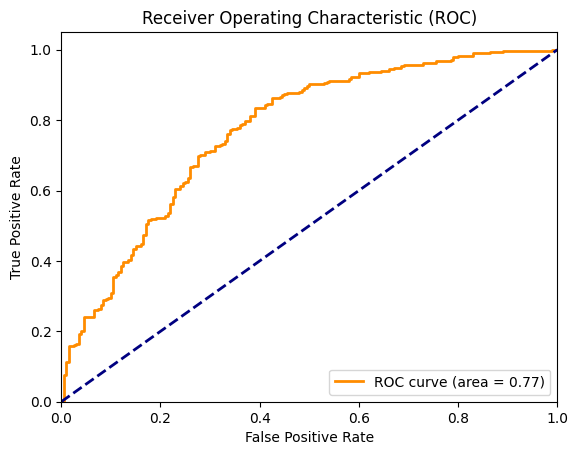

In [ ]:
# Step 9: ROC Curve
# Predicting probabilities for each class
y_pred_prob = model.predict(X_test_pad)

# Selecting probabilities for the positive class
y_pred_prob_positive = y_pred_prob[:, 1]

# Computing the ROC curve and the ROC area
fpr, tpr, _ = roc_curve(y_test_cat[:, 1], y_pred_prob_positive)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# **MODEL COMPARISON AND SELECTION**

In [ ]:
# Collecting all the Models Performance Metrics

model_performance = {
    'Logistic Regression': {'Accuracy': 0.7412, 'Precision': (0.73+0.74+0.74)/3, 'Recall': (0.41+0.93+0.49)/3, 'F1-Score': (0.52+0.83+0.59)/3},
    'Simple Neural Network': {'Accuracy': 0.7371, 'Precision': (0.74 + 0.76 + 0.66) / 3, 'Recall': (0.48 + 0.89 + 0.54) / 3, 'F1-Score': (0.58 + 0.82 + 0.60) / 3},
    'CNN': {'Accuracy': 0.7608, 'Precision': (0.67 + 0.76 + 0.83) / 3, 'Recall': (0.55 + 0.92 + 0.52) / 3, 'F1-Score': (0.60 + 0.83 + 0.64) / 3},
    'LSTM': {'Accuracy': 0.6969, 'Precision': (0.63 + 0.77 + 0.58) / 3, 'Recall': (0.52 + 0.78 + 0.60) / 3, 'F1-Score': (0.57 + 0.77 + 0.59) / 3}
}


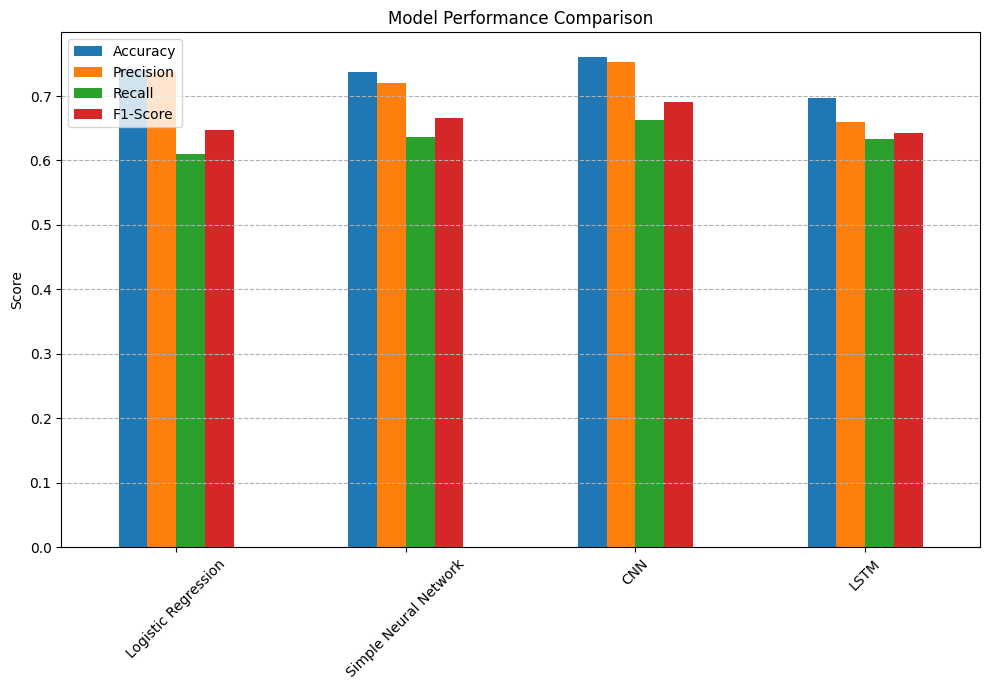

In [ ]:
# Visualizing the Models Performances
# Converting the performance dictionary to a DataFrame for easier plotting
performance_df = pd.DataFrame(model_performance).T

# Plotting the Model Performance Comparison
performance_df.plot(kind='bar', figsize=(10, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




* The **Logistic Regression Model** has a good balance between recall and precision, but has a lower F1-Score compared to the CNN and LSTM.

* The **Simple Neural Network Model** similarly has lower scores just like the Logistic Regression Model.

* **Convolutional Neural Network Model** has the highest accuracy and F1-Score compared to all the other models.

* **Language Short-Term Memory Model** has lower metrics compared to the other models, but indicates it is good at identifying positive classes, even though it's precision is lower than CNN.


The primary goal of my analysis is to correctly identify and strike a balance between precision, recall, and overall accuracy according to which the **Convolutional Neural Network Model** is the best performing model according to all the performance metrics.


# **FINDINGS**

In my analysis of the Financial News Sentiment Analysis project, I focused on evaluating the sentiment of financial news using various machine learning models, including Logistic Regression, Simple Neural Network, Convolutional Neural Network (CNN), and Long Short-Term Memory (LSTM). My goal was to identify which model performs best in classifying financial news into positive, neutral, or negative sentiments, which is an extremely crucial task for making informed investment decisions.

Upon evaluating the models based on accuracy, precision, recall, and F1-Score, I found that:

- My use of **Logistic Regression** provided a solid foundation, achieving an accuracy of 74.12%. It demonstrated a good balance between recall and precision, though its F1-Score suggested there might be room for improvement in balancing the precision-recall trade-off.

- The **Simple Neural Network** was somewhat less effective, with slightly lower scores and accuracy of 73.71%. This suggested to me that while simple neural networks have their merits, they might not be the best suited for the complexities of financial news sentiment analysis, where nuanced understanding and contextual interpretation are key.

- The **CNN model** emerged as the standout in my analysis, achieving the highest accuracy of 76.08% and F1-Score among the models I tested. Its hierarchical structure appears highly effective in capturing the semantic meanings of texts. It's overall performance confirmed my hypothesis that CNN could offer a robust solution for financial news sentiment analysis.

- The **LSTM model**, demonstrated its capability in accurately identifying positive sentiments. However, its precision was lower than CNN's, hinting at a potential increase in false positives. Nonetheless, an accuracy of 69.69% is notable.

From my perspective based off of my analysis, the CNN model is the most balanced and effective tool for this project. Not only does it provide the highest accuracy, but it also maintains an admirable balance between precision and recall. This balance makes it exceptionally suitable for predicting stock trends based on financial news sentiment. The convolutional layers of CNN, capable of capturing local dependencies and semantic relationships in texts, affirm my confidence in its robustness for this application.

In conclusion, while each model has its unique strengths and weaknesses, my analysis leads me to recommend the **CNN Model** as the most promising framework for financial news sentiment analysis. It is capable of accurately classifying news sentiments, offering potentially valuable insights for informed investment decisions. Moving forward, I plan to explore further optimizations of the CNN architecture and consider the integration of additional data sources to enhance the accuracy of predictions.

#  **CONCLUSION AND WHAT'S THE POTENTIAL FUTURE OF THIS PROJECT?**

As I reflect on the Financial News Sentiment Analysis Winter Project 2024, I'm struck by the profound impact it holds for transforming how we interact with financial news. My journey in developing this analysis and tool has been driven by a vision to harness machine learning and deep learning, not just as technological novelties, but as essential instruments that offer actionable insights into the vast world of financial information. The potential benefits and applications of this project are vast and varied, touching on several key areas that I believe will shape its future.

### **My Perspective on Benefits for Investors and Financial Institutions**

From my perspective, the ability to accurately assess the sentiment of financial news is nothing short of revolutionary for investors and financial institutions. It enables a nuanced understanding of market dynamics, beyond what traditional financial metrics can offer. Investors gain a tool that cuts through the noise, highlighting impactful sentiments that could guide more informed decisions. Financial institutions, on the other hand, can leverage these insights to refine risk management strategies, tailor advice, and anticipate market movements with greater accuracy. The depth of analysis provided by this project could fundamentally enhance strategic planning and investment outcomes.

### **Deploying This Analysis in the Real World**

Envisioning the deployment of this analysis in real life, I see it seamlessly integrating into financial platforms and investment tools. By embedding this sentiment analysis into news aggregators, trading platforms, and mobile applications, real-time insights become readily accessible. I imagine developing sophisticated alert systems that notify investors of significant sentiment shifts, offering a proactive approach to portfolio management. For financial institutions, incorporating this tool into their advisory and analytical processes could redefine the value they offer to clients, backed by a deep, sentiment-informed understanding of the market.

### **My Vision for Improvement and Future Directions**

Despite the achievements of the Financial News Sentiment Analysis project so far, I'm constantly looking for ways to enhance its capabilities. My future plans include exploring more advanced machine learning models and expanding the dataset to encompass a broader range of financial discourse. The integration of transformer-based models like BERT or GPT could refine our understanding of linguistic nuances, significantly boosting the tool's accuracy and reliability.

Looking ahead, I see the future of Financial News Sentiment Analysis as deeply intertwined with advancements in AI and natural language processing. The potential to understand complex linguistic constructs such as irony and conditional sentiments could dramatically improve the tool's sophistication. Moreover, tailoring sentiment analysis models to specific sectors or investment types offers the promise of highly customized insights, catering to the unique needs and nuances of different market segments.

### **Concluding my Financial News Sentiment Analysis project for Winter 2024**

My work on the Financial News Sentiment Analysis Winter Project 2024 is more than just a university project for me, it's a vision of how the future of financial analysis could unfold. By blending AI with an in-depth understanding of market sentiments, this project stands to redefine the landscape of investment decision-making. As I continue to refine and expand this tool, I'm excited by the possibilities it opens up for investors and financial institutions alike. I strongly believe in the lifelong pursuit of knowledge and this journey ahead promises to bring even more sophisticated predictive models, deeper market insights, and a new level of strategic advantage to those who embrace it. The evolution of financial news sentiment analysis is just beginning, and I'm committed to driving it forward, shaping a future where financial decisions are more informed, insightful, and inspired than ever before.

# **REFERENCES**

* Usmani, S., & Shamsi, J. A. (2023). LSTM based stock prediction using weighted and categorized financial news. PLOS ONE, 18(3), e0282234. https://doi.org/10.1371/journal.pone.0282234

* Sentiment Analysis in Financial News. (n.d.). Sentiment Analysis in Financial News. https://kw143.github.io/CS4641Project/

* FinBERT-LSTM: Deep Learning based stock price prediction using News Sentiment Analysis. (n.d.). Ar5iv. https://ar5iv.labs.arxiv.org/html/2211.07392

* Sentiment Analysis for Financial News. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news/code

* NLP : Financial News Sentiment Analysis. (n.d.). Kaggle.com. https://www.kaggle.com/code/khotijahs1/nlp-financial-news-sentiment-analysis

* OpenAI. (2022, November 30). ChatGPT. Chat.openai.com; OpenAI. https://chat.openai.com/ - Coding corrections

* Wan, X., Yang, J., Marinov, S., Calliess, J.-P., Zohren, S., & Dong, X. (2021). Sentiment correlation in financial news networks and associated market movements. Scientific Reports, 11(1), 3062. https://doi.org/10.1038/s41598-021-82338-6

* SEntFiN 1.0: Entity-Aware Sentiment Analysis for Financial News. (n.d.). Ar5iv. https://ar5iv.labs.arxiv.org/html/2305.12257

* Sentiment Analysis of Financial News Articles using Performance Indicators. (n.d.). Ar5iv. https://ar5iv.labs.arxiv.org/html/1811.11008